In [42]:
#install.packages("BatchGetSymbols")


In [2]:
library(ggplot2)
library(scales)
library(BatchGetSymbols)
library(lubridate)
library(tidyr)
library(forecast)


In [4]:
petr = BatchGetSymbols('PETR4.SA', first.date = as.Date('2010-12-31'),
last.date = as.Date('2020-12-31'))


Running BatchGetSymbols for:

   tickers =PETR4.SA


^GSPC | yahoo (1|1)
 | Found cache file

PETR4.SA | yahoo (1|1)
 | Found cache file
 - Got 95.9% of valid prices | Feels good!


In [5]:
petr

$df.control
# A tibble: 1 x 6
  ticker   src   download.status total.obs perc.benchmark.dat~ threshold.decisi~
  <chr>    <chr> <chr>               <int>               <dbl> <chr>            
1 PETR4.SA yahoo OK                   2478               0.959 KEEP             

$df.tickers
     price.open price.high price.low price.close    volume price.adjusted
1        27.500     27.580    26.910      27.000  22738500      20.966322
2        27.010     27.060    26.400      26.900  30936600      20.888672
3        26.680     27.350    26.580      27.220  24306800      21.137163
4        27.200     27.460    27.010      27.110  24328800      21.051748
5        27.020     27.180    26.730      26.730  17453800      20.756662
6        26.650     27.020    26.580      26.980  14366200      20.950796
7        27.100     27.400    27.070      27.150  23190100      21.082808
8        27.380     27.980    27.320      27.900  39193500      21.665205
9        28.000     28.120    27.310      27.310  31826100      21.207047
10       27.270     27.710    27.250      27.550  20220300      21.393415
11       27.420     27.770    27.360      27.450  19288800      21.315767
12       27.650     27.760    27.400      27.720  22139400      21.525429
13       27.800     27.950    27.250      27.300  22631600      21.199280
14       27.150     27.520    26.960      27.270  21486200      21.175987
15       27.410     27.510    27.050      27.050  18127100      21.005152
16       27.080     27.250    26.810      27.000  10765700      20.966322
17       27.090     27.330    26.710      26.830  21396900      20.834314
18       26.950     27.150    26.710      26.870  18552100      20.865377
19       27.050     27.080    26.250      26.670  28037200      20.710075
20       26.860     27.250    26.660      27.090  33947200      21.036213
21       27.300     27.720    27.110      27.640  28782500      21.463303
22       27.600     27.980    27.500      27.800  33156700      21.587551
23       27.760     28.120    27.700      28.030  27639400      21.766159
24       28.040     28.220    27.560      27.620  27702000      21.447781
25       27.800     27.870    27.110      27.220  23873700      21.137163
26       27.000     27.320    26.840      26.880     21047      20.873140
27       26.880     26.880    26.880      26.880         0      20.873140
28       26.880     26.880    26.880      26.880         0      20.873140
29       26.450     26.700    26.300      26.400  19504200      20.500406
30       26.410     26.910    26.240      26.750  18258200      20.772196
31       26.670     27.320    26.630      26.970  27939600      20.943027
32       27.200     27.450    27.070      27.310  24193500      21.207047
33       27.400     27.440    27.040      27.250  19143600      21.160460
34       27.160     27.440    27.110      27.370  16769000      21.253643
35       27.470     27.650    27.250      27.400  22204200      21.276936
36       27.460     27.950    27.450      27.770  36610900      21.564253
37       27.910     28.900    27.800      28.710  62622100      22.294191
38       28.710     28.710    28.710      28.710         0      22.294191
39       28.410     28.750    28.150      28.600  27201000      22.208775
40       28.440     28.680    28.160      28.580  28891100      22.193243
41       28.500     28.790    28.190      28.290  26547900      21.968050
42       28.300     28.960    28.170      28.900  25808400      22.441732
43       28.920     28.970    28.600      28.960  17305300      22.488329
44       29.000     29.170    28.720      29.080  21019800      22.581507
45       29.080     29.080    29.080      29.080         0      22.581507
46       28.400     28.430    27.880      28.120  22751200      21.836040
47       27.950     28.400    27.670      28.170  20803900      21.874868
48       28.000     28.420    27.870      28.280  13554000      21.960287
49       27.450     28.170    27.450      28.040  22515300      21.773920
50       28.16

In [224]:
class(petr)

[1] "list"

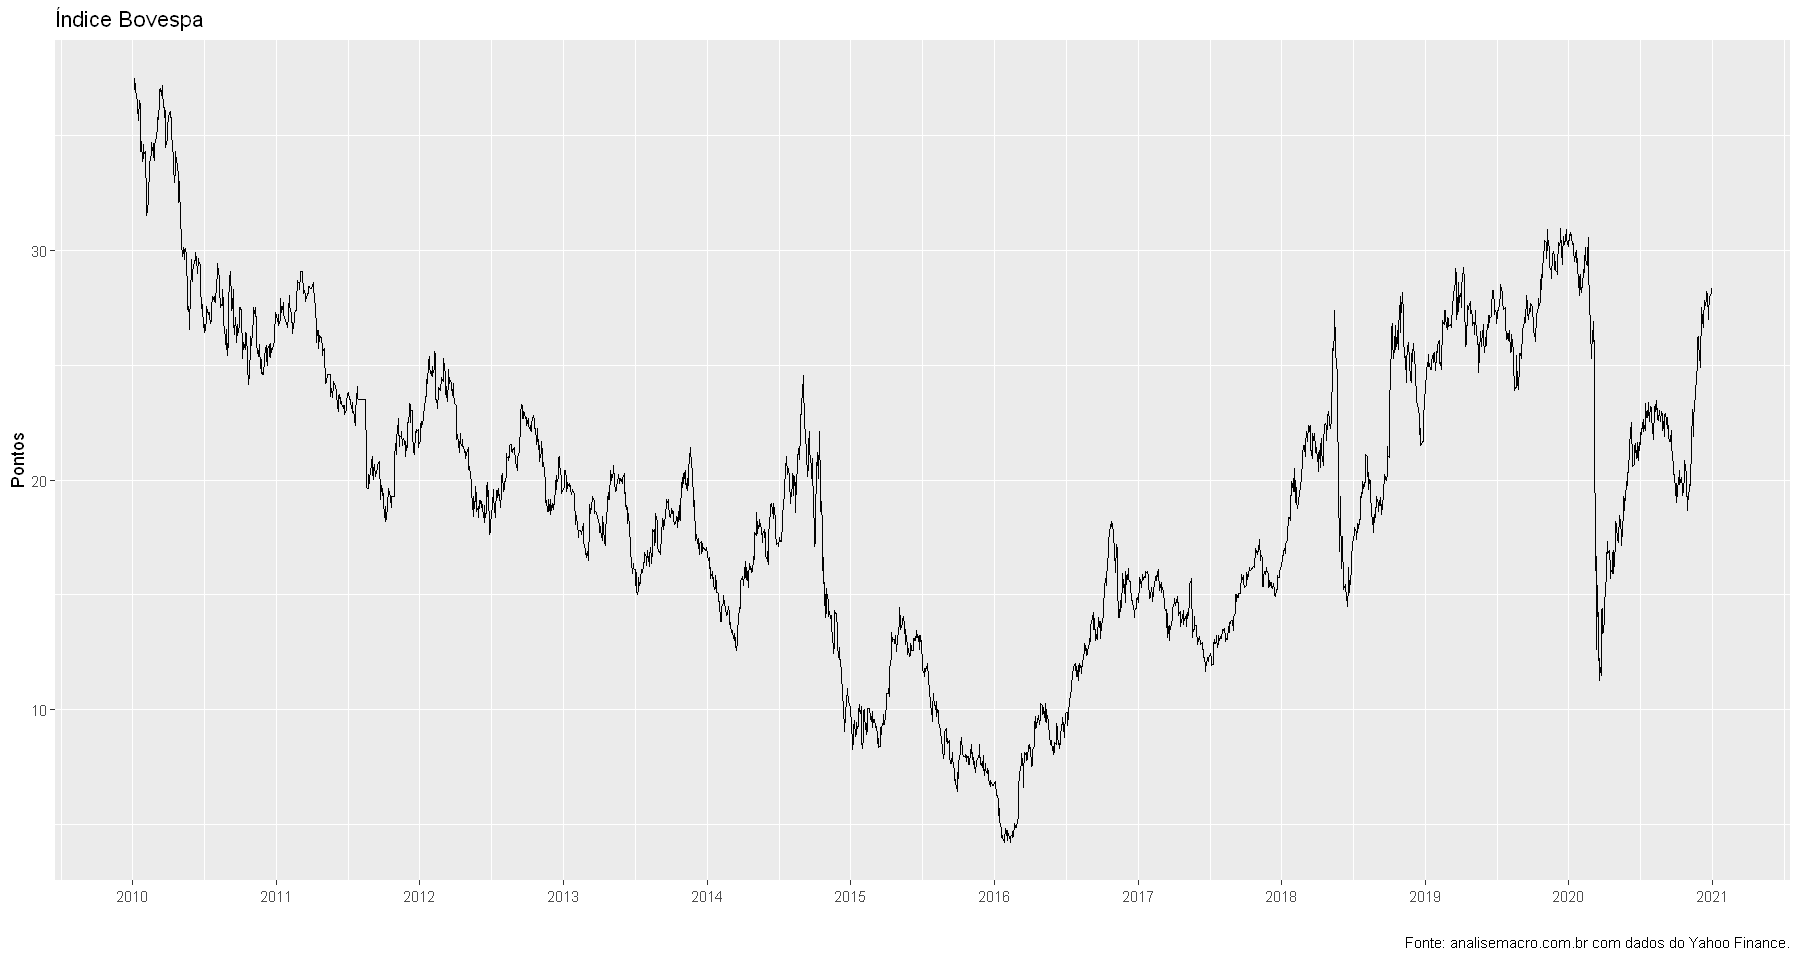

In [5]:
options(repr.plot.width = 15, repr.plot.height = 8)
ggplot(petr$df.tickers, aes(x = ref.date, y = price.close))+
 geom_line()+
 scale_x_date(breaks = date_breaks("1 years"),
 labels = date_format("%Y"))+
 xlab('')+ylab('Pontos')+
 labs(title='Índice Bovespa',
 caption='Fonte: analisemacro.com.br com dados do Yahoo Finance.')

In [14]:
df = petr$df.tickers
head(df)

,price.open,price.high,price.low,price.close,volume,price.adjusted,ref.date,ticker,ret.adjusted.prices,ret.closing.prices
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<chr>,<dbl>,<dbl>
1,27.50,27.58,26.91,27.00,22738500,20.96632,2011-01-03,PETR4.SA,NA,NA
2,27.01,27.06,26.40,26.90,30936600,20.88867,2011-01-04,PETR4.SA,-0.003703558,-0.003703704
3,26.68,27.35,26.58,27.22,24306800,21.13716,2011-01-05,PETR4.SA,0.011895969,0.011895874
4,27.20,27.46,27.01,27.11,24328800,21.05175,2011-01-06,PETR4.SA,-0.004040987,-0.004041073
5,27.02,27.18,26.73,26.73,17453800,20.75666,2011-01-07,PETR4.SA,-0.014017173,-0.014017004
6,26.65,27.02,26.58,26.98,14366200,20.95080,2011-01-10,PETR4.SA,0.009352853,0.009352787


In [15]:
class(df)

[1] "data.frame"

In [16]:
df = df %>%
    select(ref.date, price.close) %>% 
    setNames(c("data", "preco"))

In [17]:
df

data,preco
<date>,<dbl>
2011-01-03,27.00
2011-01-04,26.90
2011-01-05,27.22
2011-01-06,27.11
2011-01-07,26.73
2011-01-10,26.98
2011-01-11,27.15
2011-01-12,27.90
2011-01-13,27.31


In [18]:
df$mes = month(df$data, label = TRUE)
df$ano = year(df$data)

In [265]:
df$data = NULL


In [19]:
df$data = format(df$data,"%m/%Y")
df

data,preco,mes,ano
<chr>,<dbl>,<ord>,<dbl>
01/2011,27.00,jan,2011
01/2011,26.90,jan,2011
01/2011,27.22,jan,2011
01/2011,27.11,jan,2011
01/2011,26.73,jan,2011
01/2011,26.98,jan,2011
01/2011,27.15,jan,2011
01/2011,27.90,jan,2011
01/2011,27.31,jan,2011


In [20]:
df = group_by(df,data,ano)%>%summarise(preco=mean(preco))
df

`summarise()` has grouped output by 'data'. You can override using the `.groups` argument.



data,ano,preco
<chr>,<dbl>,<dbl>
01/2011,2011,27.155000
01/2012,2012,23.584762
01/2013,2013,19.573810
01/2014,2014,15.626818
01/2015,2015,9.230476
01/2016,2016,5.328421
01/2017,2017,15.598095
01/2018,2018,18.019091
01/2019,2019,25.107619


In [21]:
df = df %>% 
  arrange(ano)

In [22]:
df

data,ano,preco
<chr>,<dbl>,<dbl>
01/2011,2011,27.15500
02/2011,2011,27.53850
03/2011,2011,28.35000
04/2011,2011,26.86790
05/2011,2011,24.42123
06/2011,2011,23.40048
07/2011,2011,23.30476
08/2011,2011,21.93522
09/2011,2011,20.14000


In [30]:
df$ano=NULL

In [31]:
df

data,preco
<chr>,<dbl>
01/2011,27.15500
02/2011,27.53850
03/2011,28.35000
04/2011,26.86790
05/2011,24.42123
06/2011,23.40048
07/2011,23.30476
08/2011,21.93522
09/2011,20.14000


In [32]:
petro <- ts(df[, 2], start = c(2010, 1), frequency = 12)
petro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,27.155000,27.538500,28.350000,26.867895,24.421227,23.400476,23.304762,21.935217,20.140000,19.247000,21.755500,22.240000
2011,23.584762,24.339444,24.098636,21.611000,19.466818,18.680000,19.194286,20.920000,22.216842,22.161364,19.760000,19.748889
2012,19.573810,17.537778,18.423000,18.347273,20.008095,17.894500,15.980000,17.181364,18.223810,18.670000,20.037895,17.154210
2013,15.626818,14.260500,13.815263,15.988000,17.765714,17.813684,19.083636,20.618571,21.286364,18.034348,13.801579,10.774500
2014,9.230476,9.531667,9.133636,12.193500,13.366000,12.962381,11.133636,9.223333,7.688095,7.968571,7.861579,7.188500
2015,5.328421,4.644211,7.551364,9.040000,9.320476,8.920455,10.911429,12.267826,13.529524,16.593500,15.565000,15.019048
2016,15.598095,15.435556,14.219130,14.311111,14.150000,12.500909,12.747619,13.453913,15.099048,16.203182,16.225909,15.510476
2017,18.019091,20.157647,21.693810,21.617143,23.284286,15.816667,18.532381,19.344782,19.582105,25.695000,25.617368,23.268333
2018,25.107619,26.357500,27.879444,27.683334,26.217273,27.074737,27.337727,25.173636,27.008095,27.871304,29.755790,30.152105
2019,29.727273,28.855882,16.398636,16.445000,18.526000,21.365714,22.621739,22.701428,21.445238,19.825714,23.118947,27.435500


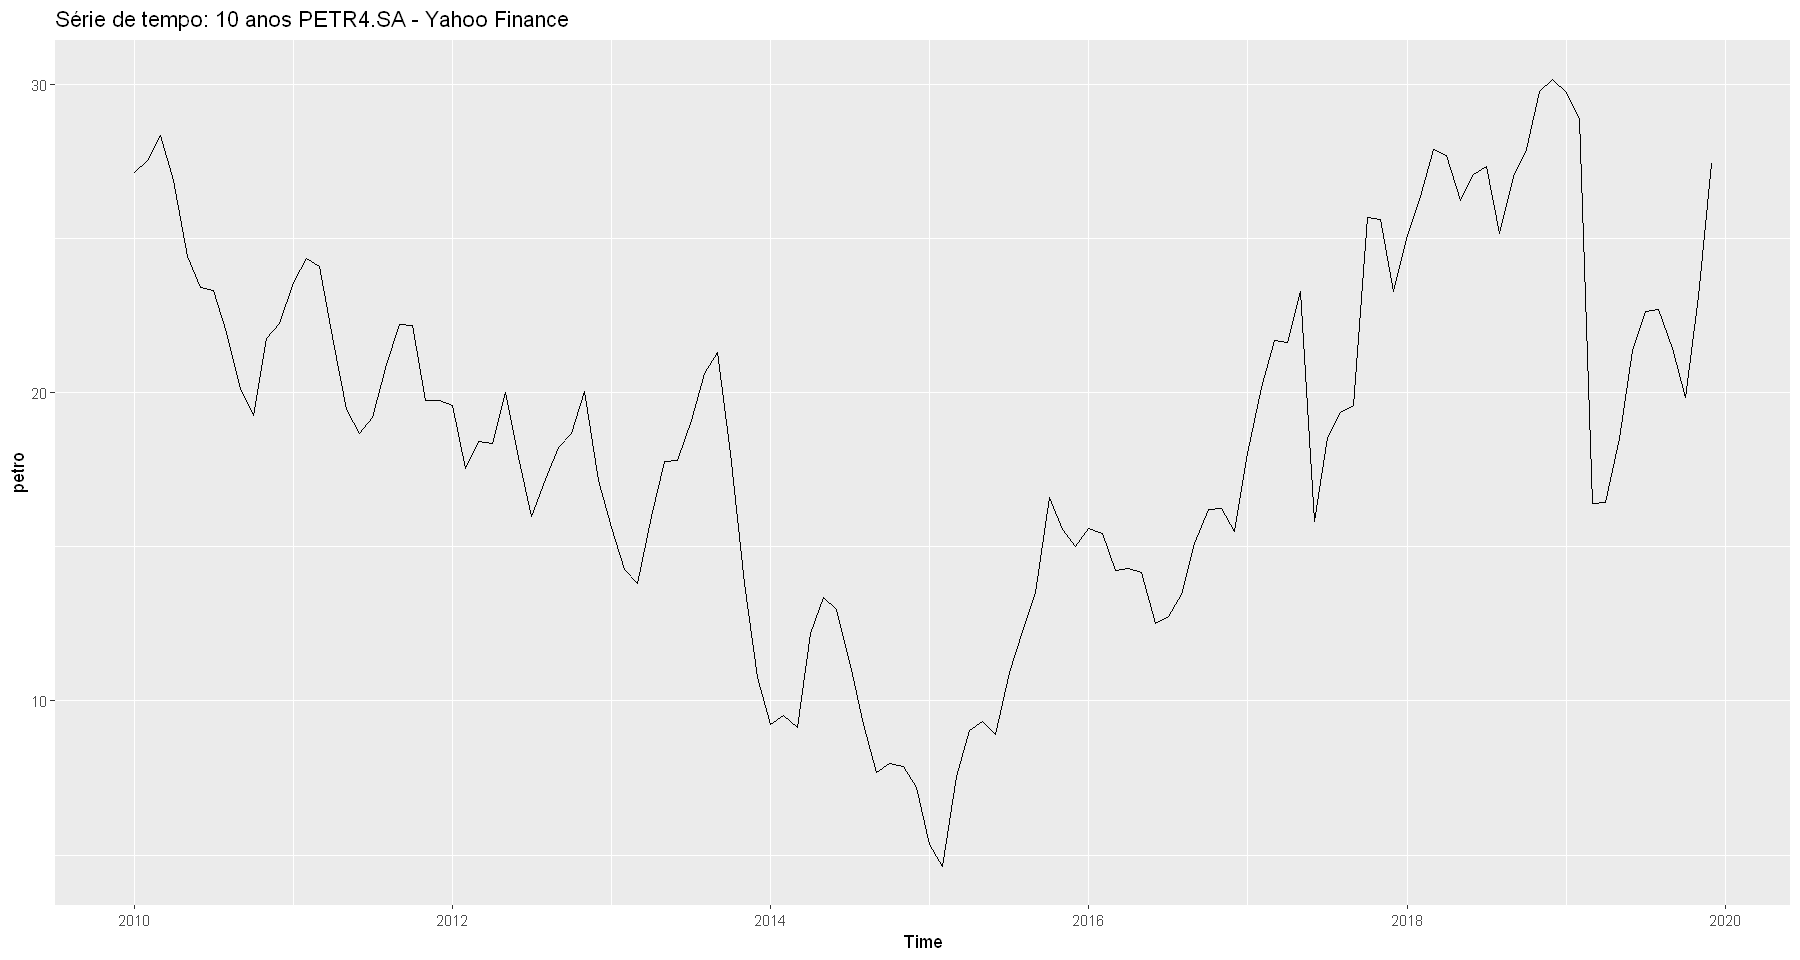

In [38]:
options(repr.plot.width = 15, repr.plot.height = 8)
autoplot(petro, main="Série de tempo: 10 anos PETR4.SA - Yahoo Finance")

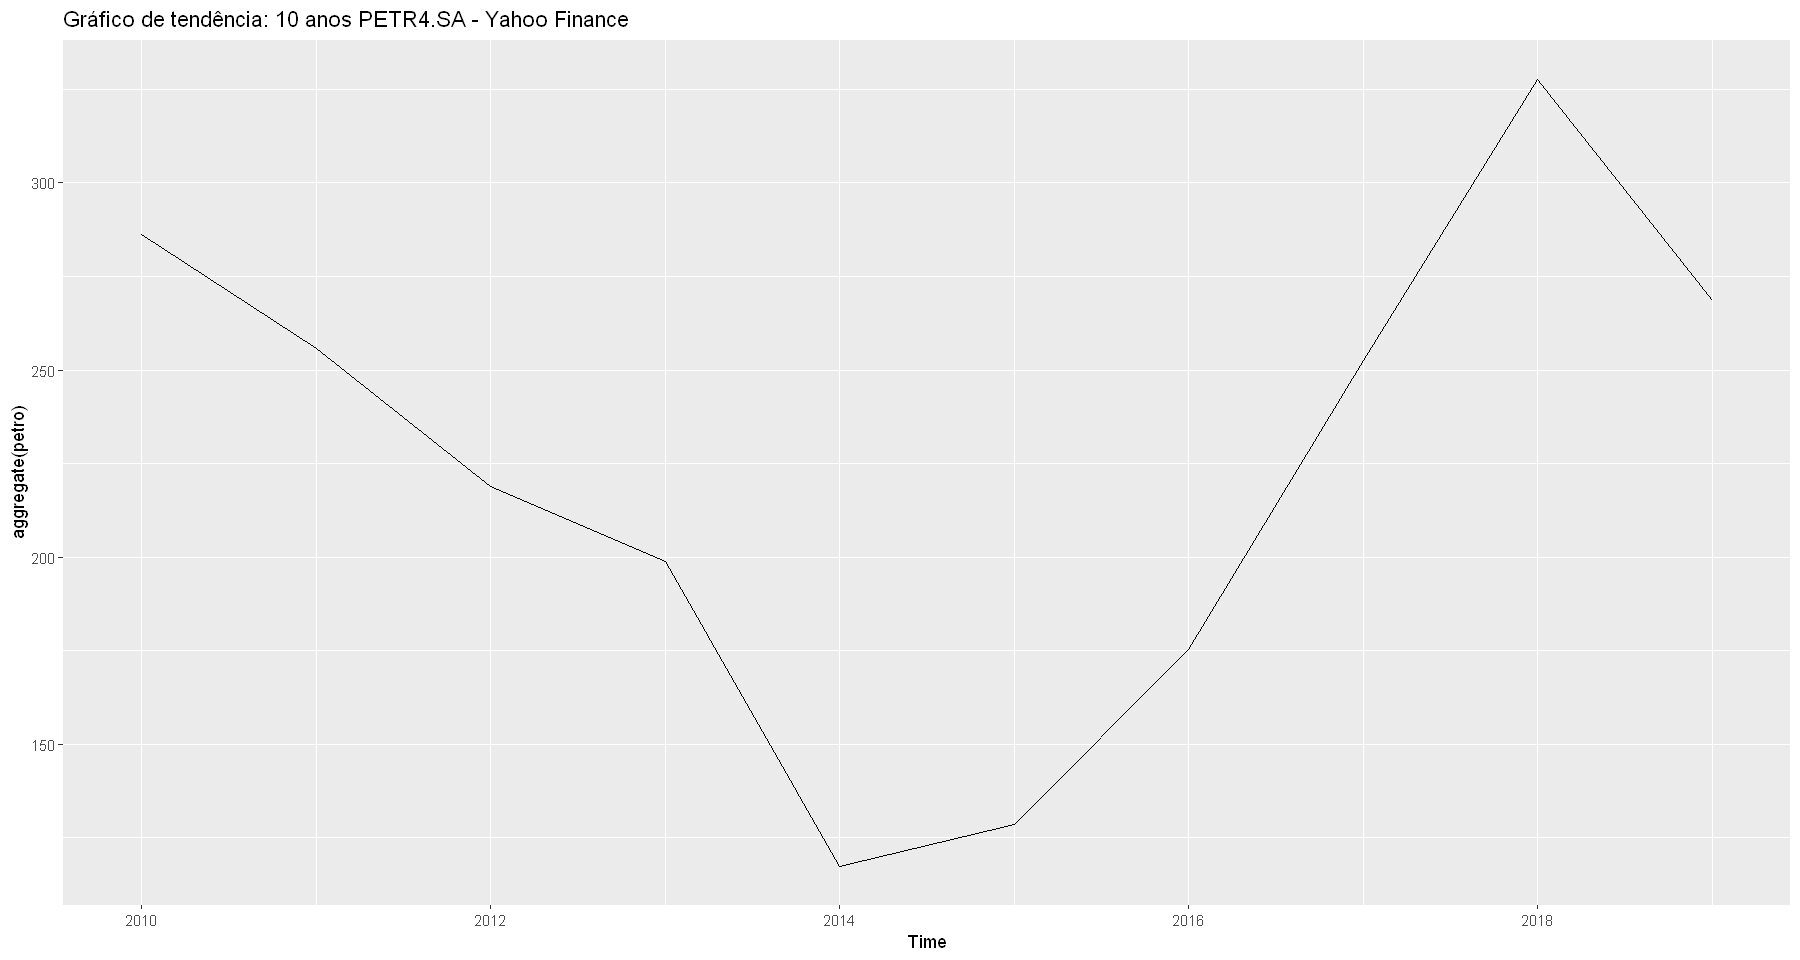

In [39]:
autoplot(aggregate(petro),main="Gráfico de tendência: 10 anos PETR4.SA - Yahoo Finance")

In [40]:
dec = decompose(petro)

In [41]:
attributes(dec)

$names
[1] "x"        "seasonal" "trend"    "random"   "figure"   "type"    

$class
[1] "decomposed.ts"

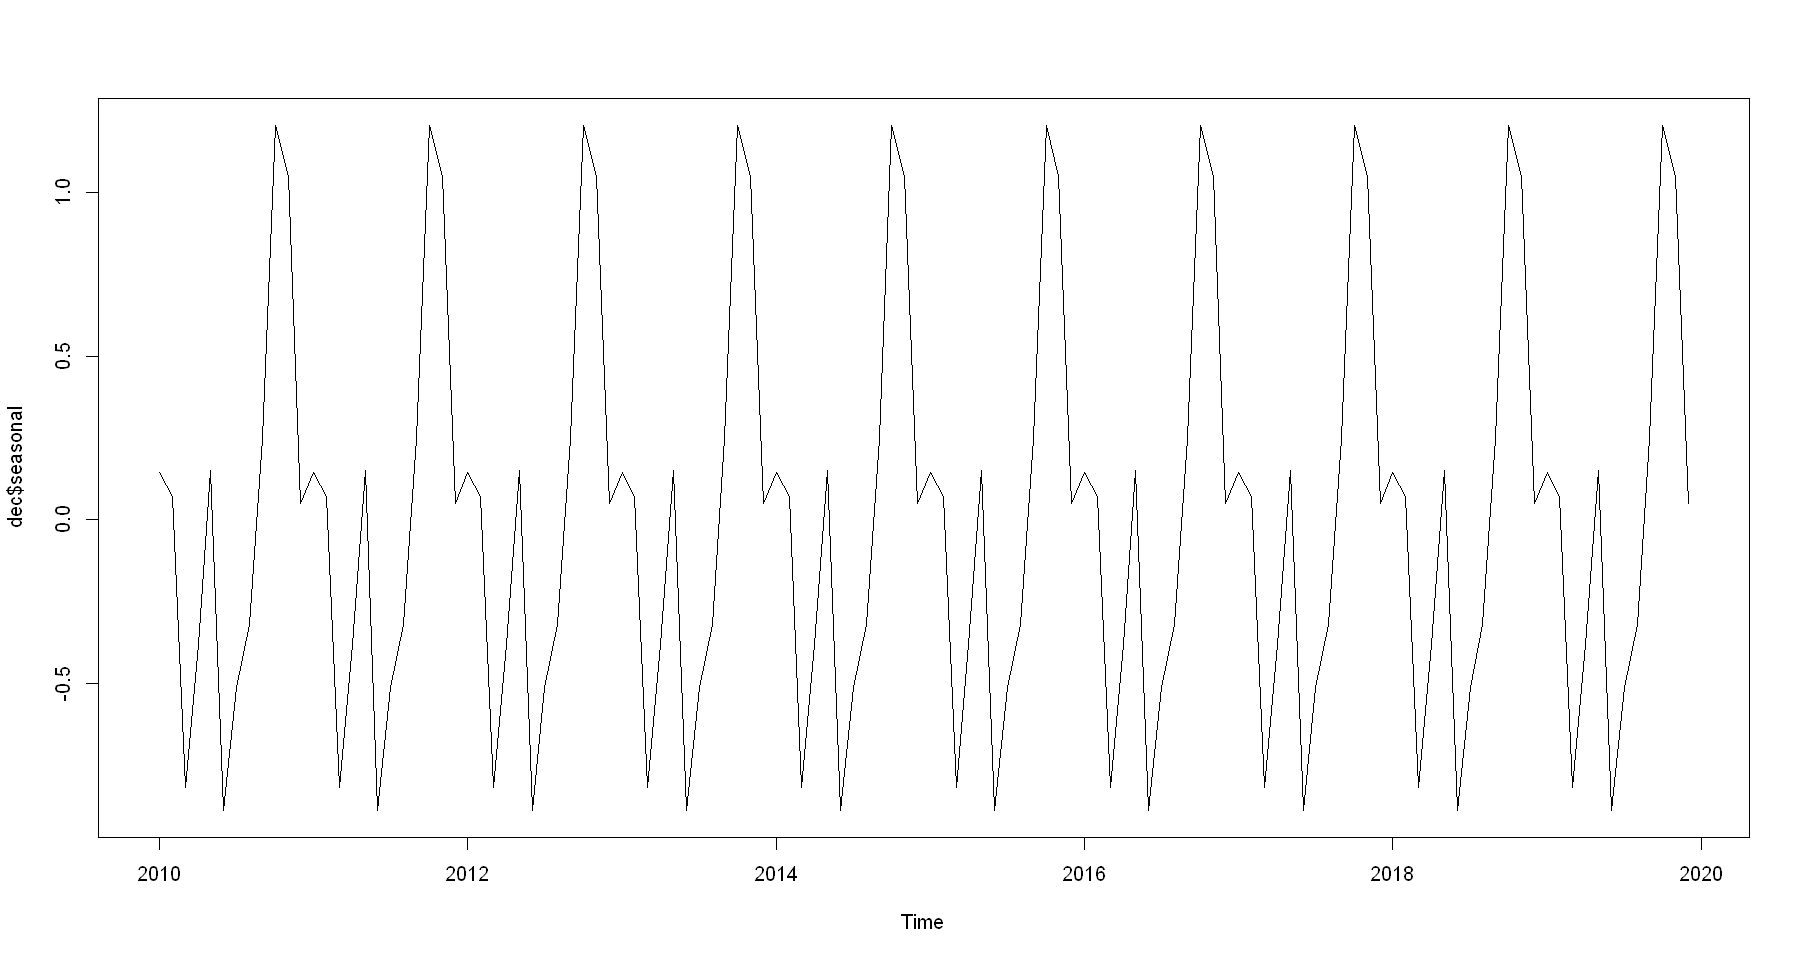

In [43]:
plot(dec$seasonal)

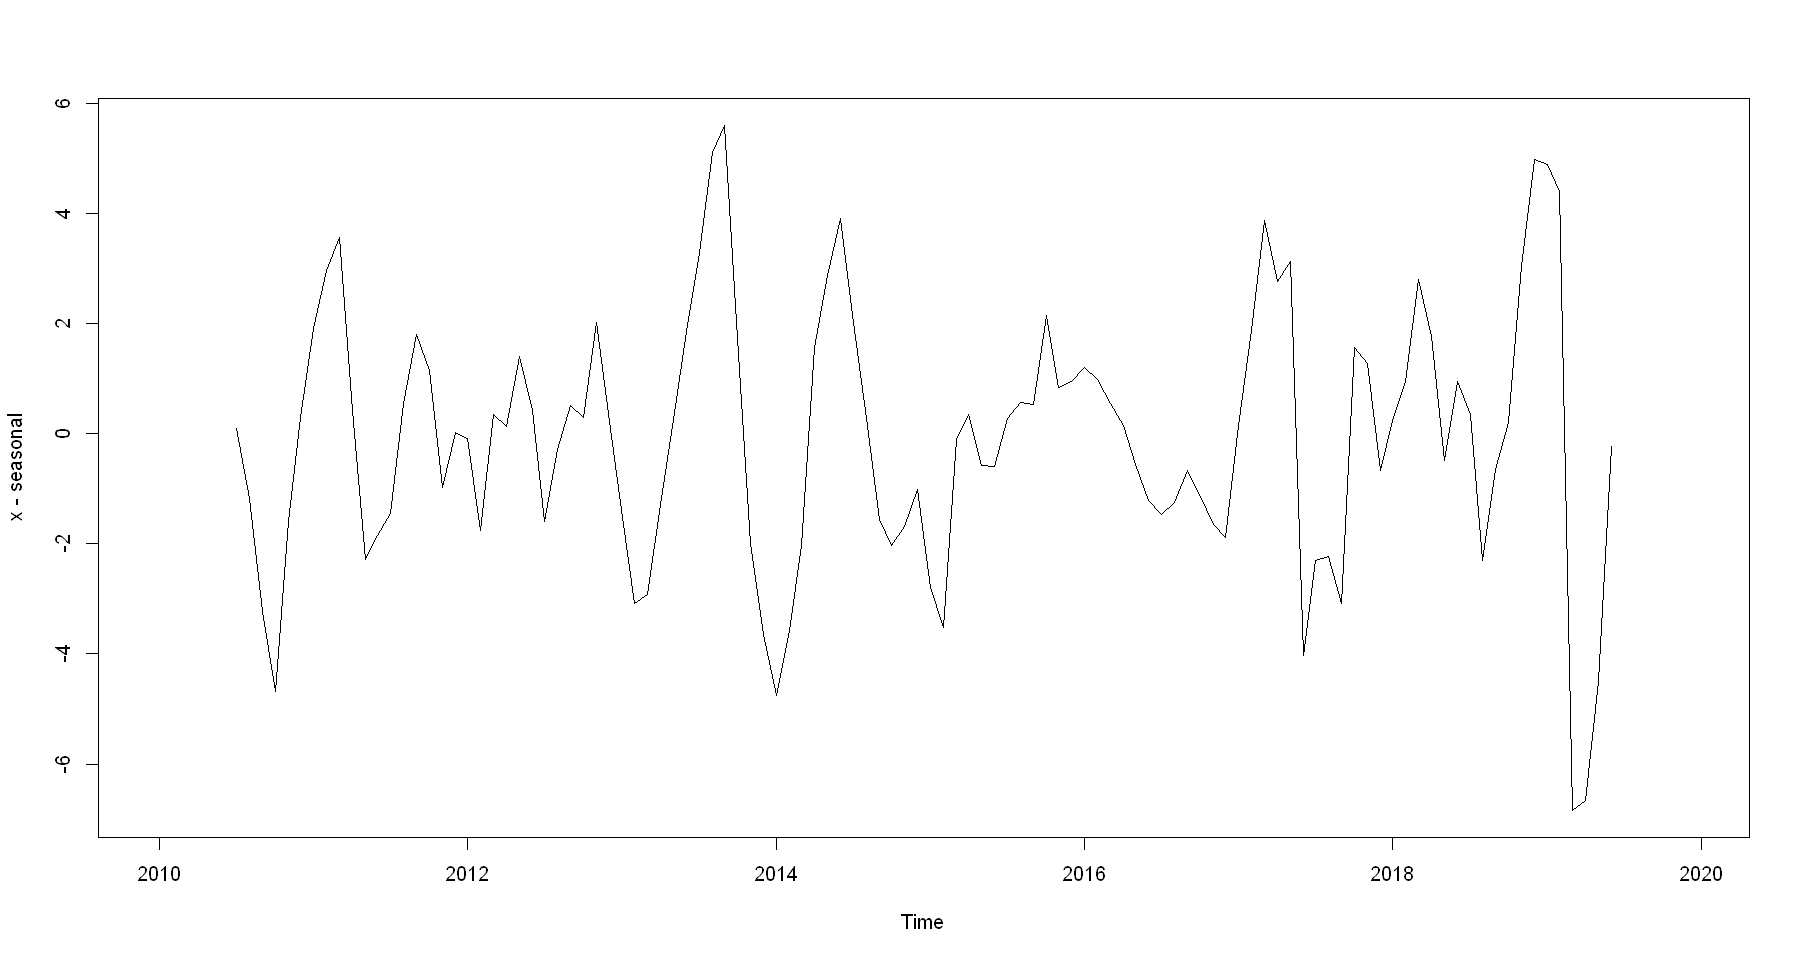

In [44]:
plot(dec$random)

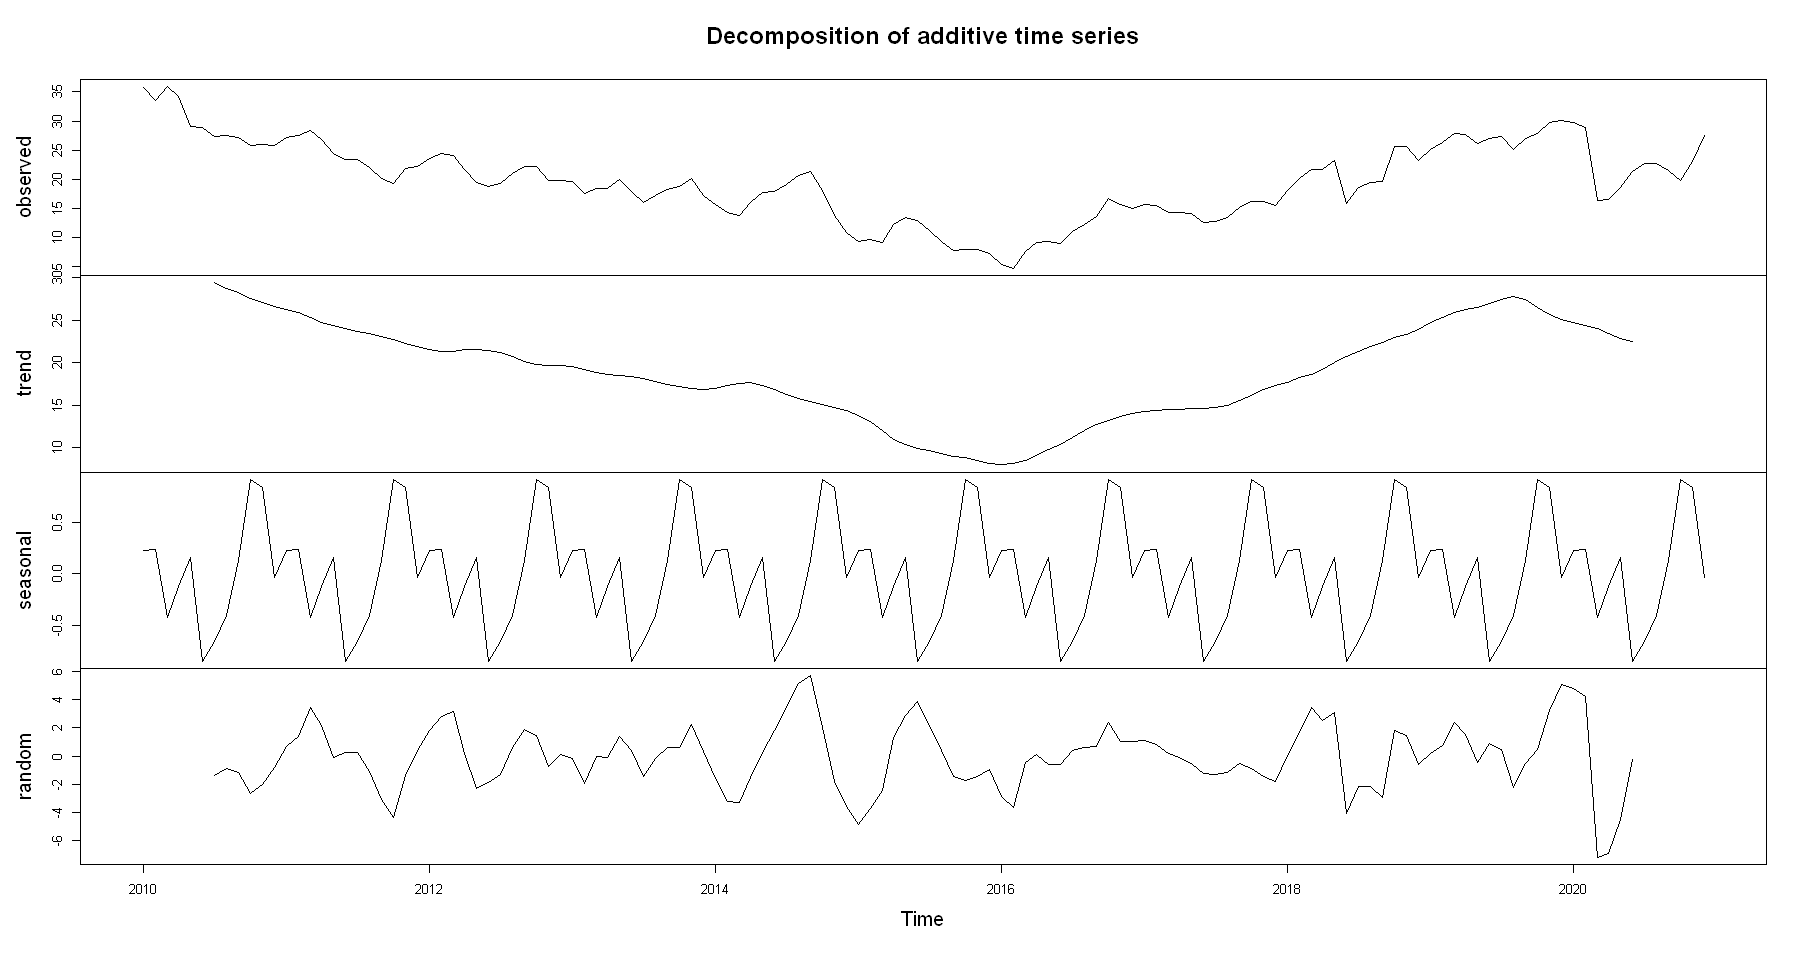

In [292]:
petro %>% decompose %>% plot

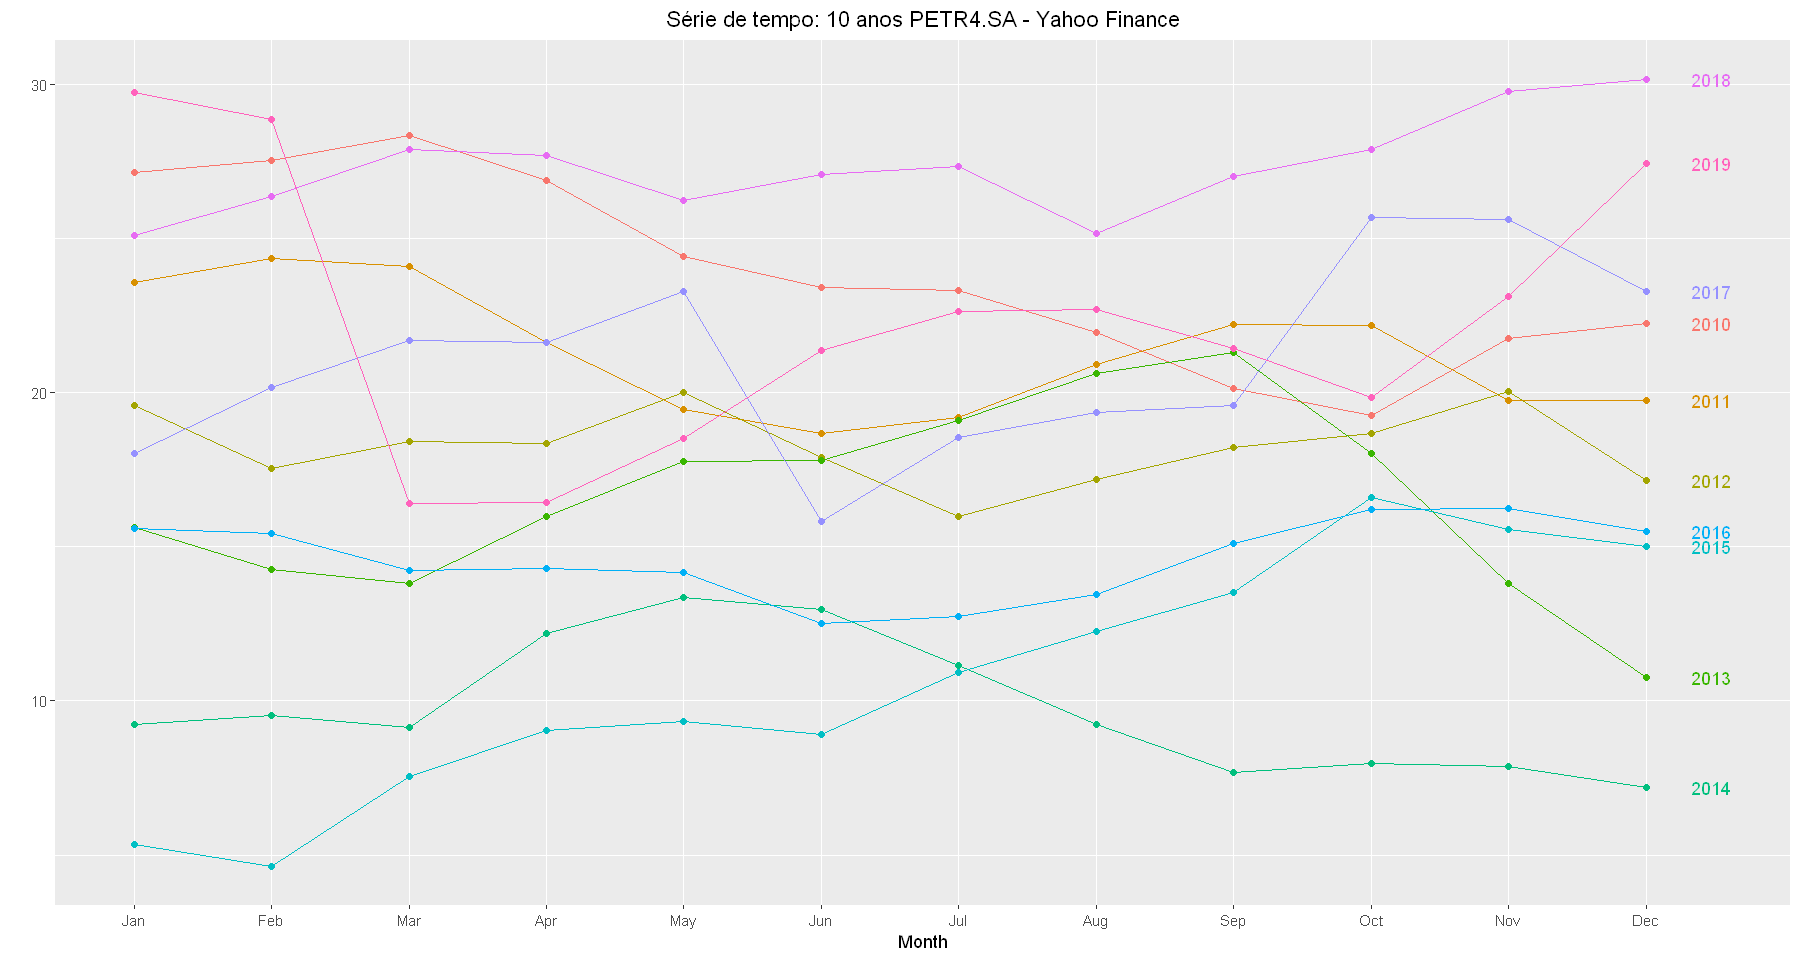

In [47]:
ggseasonplot(petro, year.labels = TRUE) + geom_point() + theme(plot.title = element_text(hjust = 0.5)) + 
labs(title='Série de tempo: 10 anos PETR4.SA - Yahoo Finance')

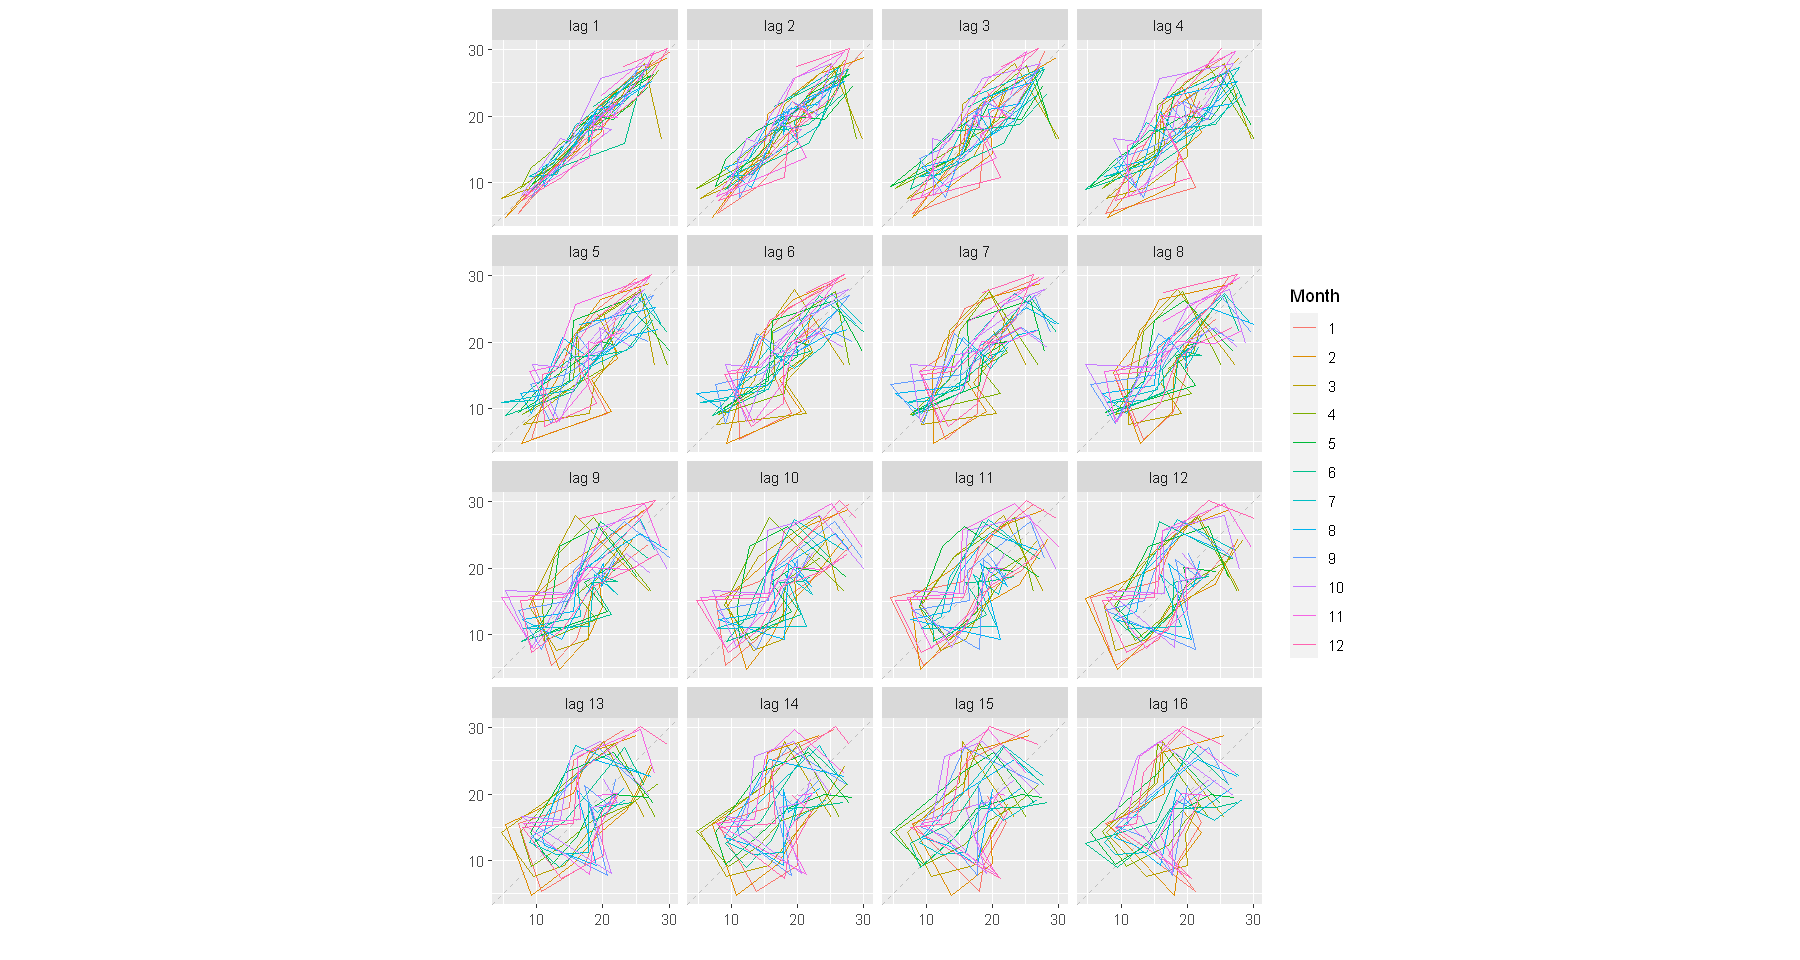

In [48]:
petro_ <- window(petro, start=2010)
gglagplot(petro_)

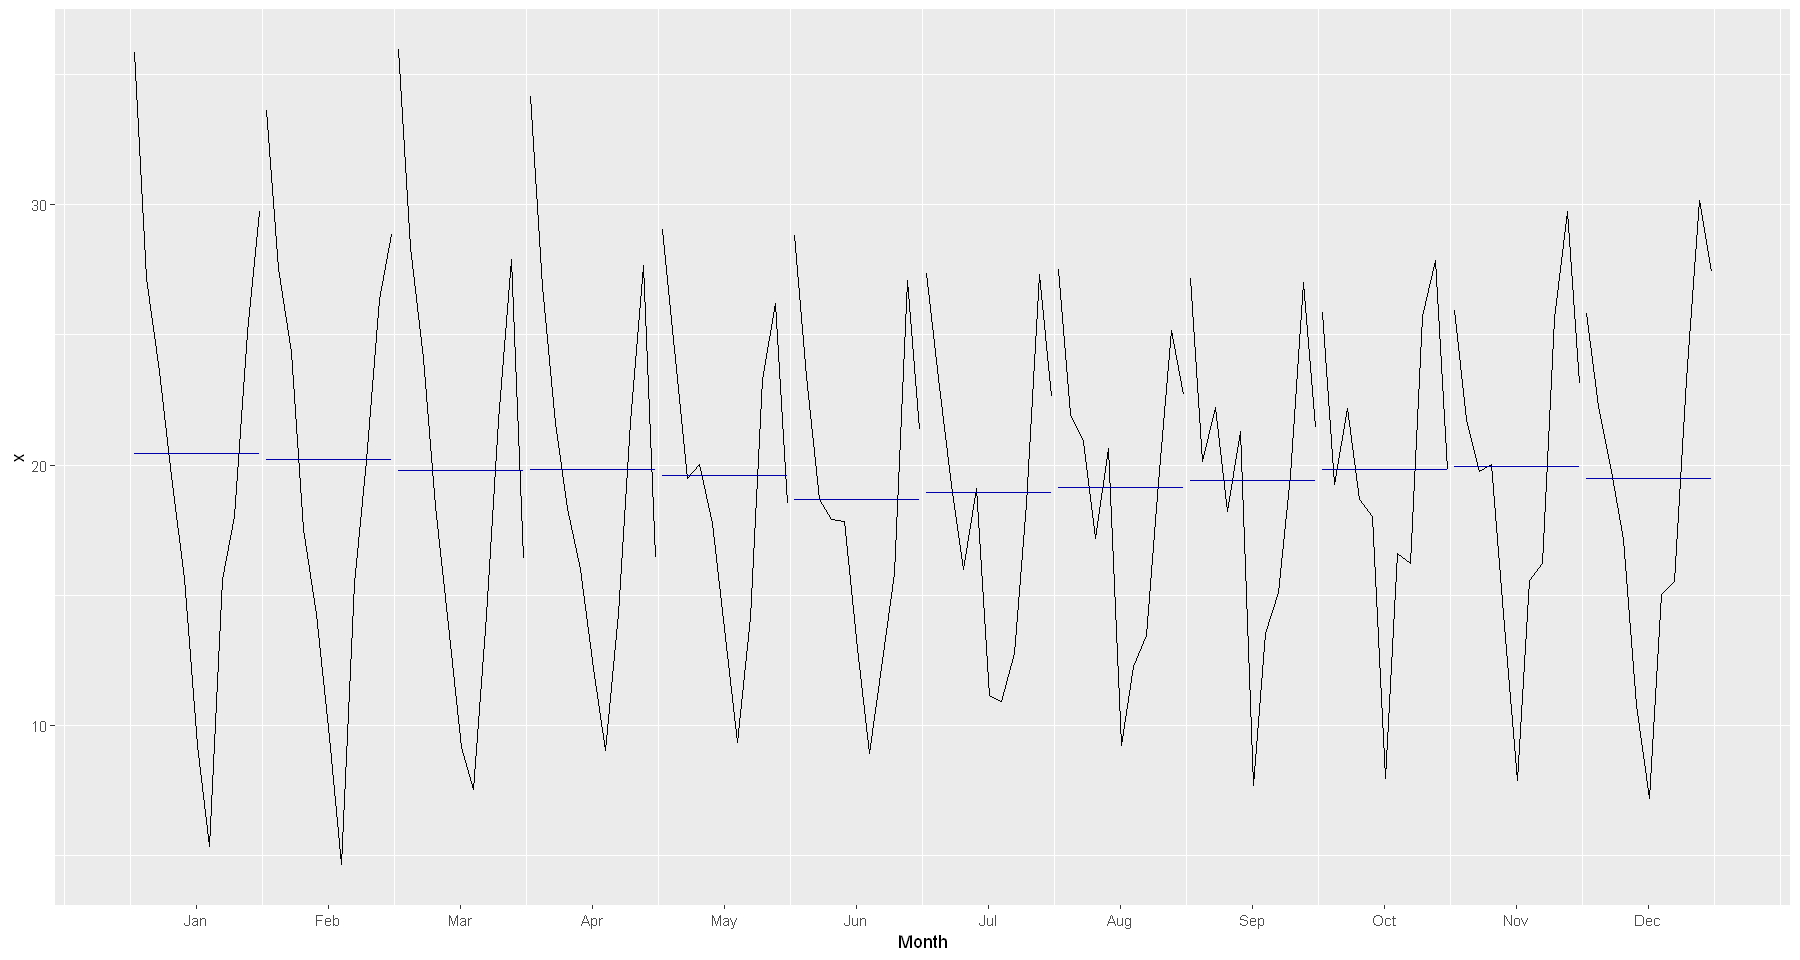

In [294]:
ggmonthplot(petro)

In [295]:
arima = auto.arima(petro)
arima

Series: petro 
ARIMA(0,1,0) 

sigma^2 estimated as 4.512:  log likelihood=-284.57
AIC=571.15   AICc=571.18   BIC=574.02

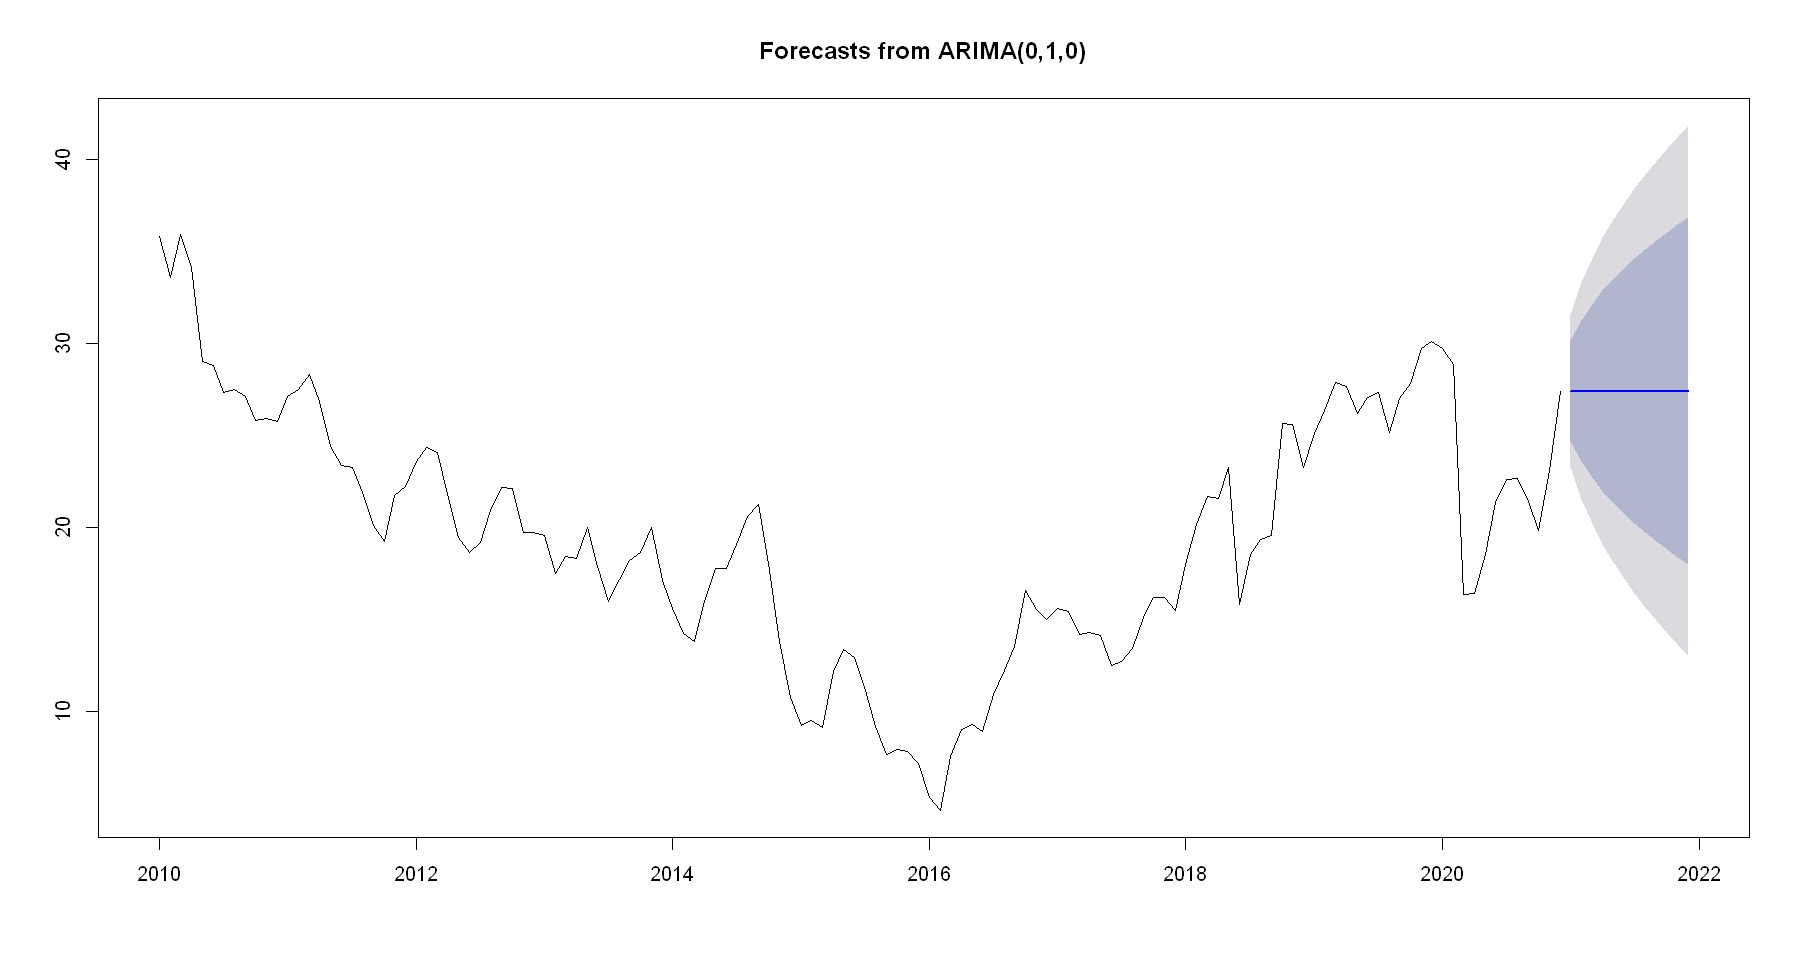

In [296]:
predict = forecast(arima, h=12)
plot(predict)

Warning message in modeldf.default(object):
"Could not find appropriate degrees of freedom for this model."


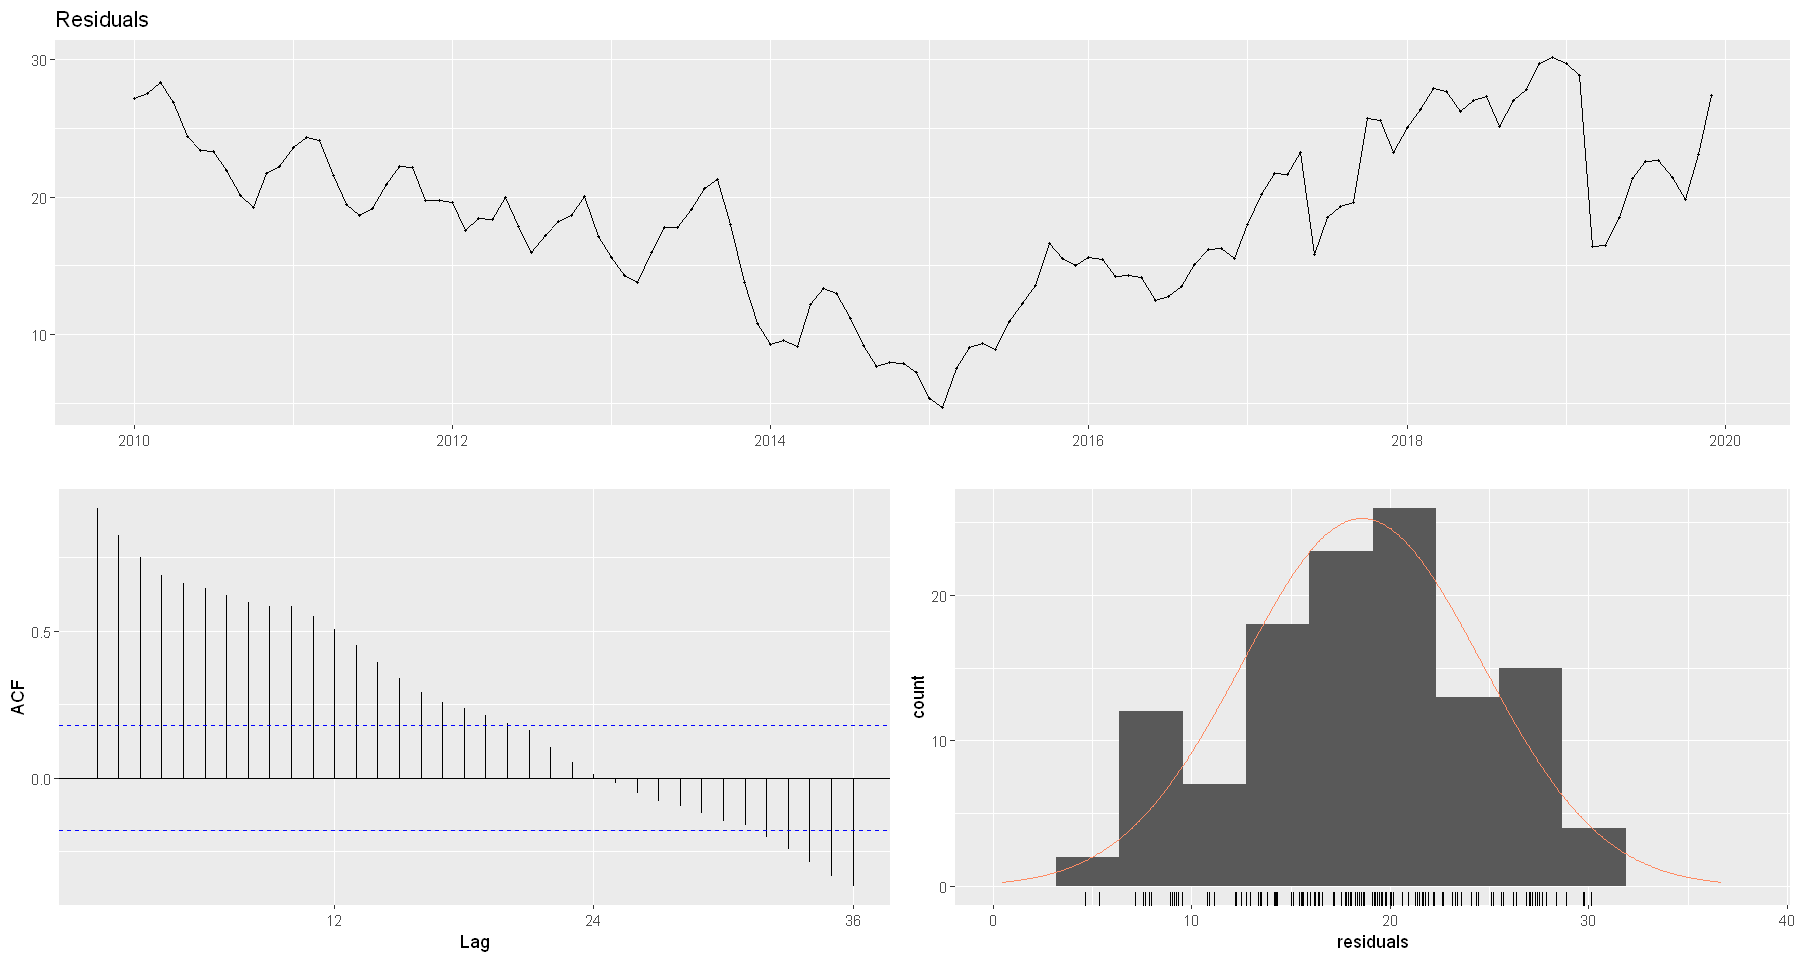

In [49]:
checkresiduals(petro)